# Research on alcohol consumption by students

**Context:**
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

[Kaggle](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data?select=student-por.csv)


# Importing the necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/CSE_student_performances.csv
/content/student-por.csv
/content/student-mat.csv
/content/.config/gce
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/logs/2024.02.28/14.26.40.982380.log
/content/.config/logs/2024.02.28/14.26.32.892350.log
/content/.config/logs/2024.02.28/14.26.23.707193.log
/content/.config/logs/2024.02.28/14.26.50.663871.log
/content/.config/logs/2024.02.28/14.25.58.242786.log
/content/.config/logs/2024.02.28/14.26.51.573026.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


# Description of Variables

**Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:**

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher
education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher
education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

**These grades are related with the course subject, Math or Portuguese:**

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .

These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

In [33]:
#Math df
df_mat = pd.read_csv('/content/student-mat.csv')

#Portuguese df
df_por = pd.read_csv('/content/student-por.csv')

print(df_mat.shape)
print(df_por.shape)

(395, 33)
(649, 33)


In [34]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [35]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [36]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_mat.isnull().sum()

In [ ]:
df_por.isnull().sum()

In [ ]:
# Calculate the number of rows needed to display the subplots
num_cols = 4
num_rows = (len(df_mat.columns) - 1) // num_cols + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(df_mat.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(df_mat[column], bins=20, density=True, alpha=0.6, color='red')
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

plt.show()

In [ ]:
# Calculate the number of rows needed to display the subplots
num_cols = 4
num_rows = (len(df_por.columns) - 1) // num_cols + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(df_por.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(df_mat[column], bins=20, density=True, alpha=0.6, color='green')
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

plt.show()

To simplify working with graphs, we will make an interactive display of graphs

In [ ]:
def plot_distribution(column):
    plt.figure(figsize=(8, 6))
    plt.hist(df_mat[column], bins=20, density=False, alpha=0.6, color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=df_mat.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_distribution, column=column_selector)

In [ ]:
# Filter out non-numeric columns to avoid conversion errors
numeric_df = df_mat.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap of Student Data')

plt.show()

In [38]:
# df_mat = df_mat.drop(columns=['G1', 'G2'])
# df_por = df_por.drop(columns=['G1', 'G2'])
df_mat = df_mat.drop(columns=['G1'])
df_por = df_por.drop(columns=['G1'])

In [16]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [17]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [ ]:
# Calculate the number of rows and columns needed for the subplots
num_cols = 4
num_rows = (len(df_mat.columns) - 1) // num_cols + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(df_mat.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df_mat.groupby(column)['G3'].mean()

    # Plot the bar plot for G3_mat mean by category in the current column
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, ax=axes[row_idx, col_idx], palette='bright')
    axes[row_idx, col_idx].set_title(f'Mean Grade (G3) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Grade (G3)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

plt.show()

In [ ]:
# Calculate the number of rows and columns needed for the subplots
num_cols = 4
num_rows = (len(df_por.columns) - 1) // num_cols + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(df_por.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df_por.groupby(column)['G3'].mean()

    # Plot the bar plot for G3_mat mean by category in the current column
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, ax=axes[row_idx, col_idx], palette='bright')
    axes[row_idx, col_idx].set_title(f'Mean Grade (G3) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Grade (G3)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

plt.show()

In [ ]:
def plot_mean(column):
    plt.figure(figsize=(8, 6))
    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df_mat.groupby(column)['G3'].mean()
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, palette='bright')
    plt.title(f'Mean Grade (G3) by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Grade (G3)')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=df_mat.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_mean, column=column_selector)

In [ ]:
for col in list(df_mat.columns):
    print(col, '\n', df_mat[col].value_counts(), '\n')

In [39]:
binary_columns = [col for col in df_mat.columns if df_mat[col].nunique() == 2]

# OneHot Encoding
df_mat = pd.get_dummies(df_mat, columns=binary_columns, drop_first=True)
df_por = pd.get_dummies(df_por, columns=binary_columns, drop_first=True)

In [40]:
# Delete postfixes like _M, _yes
new_column_names = {col: col.rsplit('_', 1)[0] for col in df_mat.columns if '_' in col}
df_mat = df_mat.rename(columns=new_column_names)

new_column_names = {col: col.rsplit('_', 1)[0] for col in df_por.columns if '_' in col}
df_por = df_por.rename(columns=new_column_names)

In [41]:
object_columns_list = list(df_mat.columns[df_mat.dtypes == 'object'])
df_mat = pd.get_dummies(df_mat, columns=object_columns_list, drop_first=True)
df_por = pd.get_dummies(df_por, columns=object_columns_list, drop_first=True)

In [25]:
df_mat.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,0,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,1,0,0,0,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,1,0,1,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,0,0,1,0,0,0,0


In [42]:
X_mat = df_mat.drop(columns=['G3'])
y_mat = df_mat['G3']

X_por = df_por.drop(columns=['G3'])
y_por = df_por['G3']

In [43]:
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, y_mat, test_size=0.3, random_state=42)
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size=0.3, random_state=42)

In [44]:
# Initialize the RandomForestRegressor
rand_forest = RandomForestRegressor(random_state=42)

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rand_forest_search = GridSearchCV(estimator=rand_forest, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Assuming X_train_mat and y_train_mat are correctly defined and hold your training data
# Fit GridSearchCV to the training data
rand_forest_search.fit(X_train_mat, y_train_mat)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
# Best model parameters
print("Best parameters:", rand_forest_search.best_params_)

# Predict with the best model
predictions = rand_forest_search.predict(X_test_mat)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_mat, predictions))
print(f'Test RMSE: {rmse}')

print(f'Test r2_score: {r2_score(y_test_mat, predictions)}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE: 1.8270550188806047
Test r2_score: 0.848143007359744


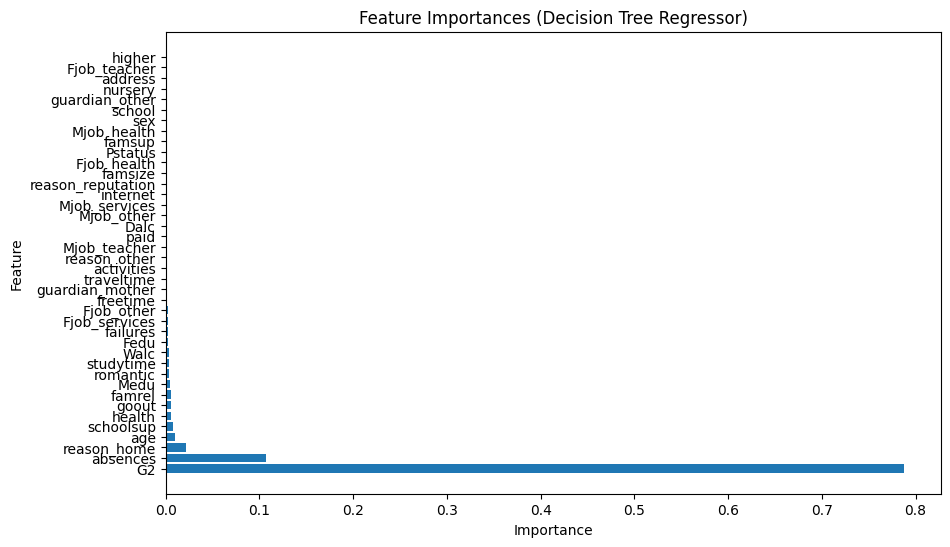

In [47]:
# Extract feature importances from the decision tree regressor model
feature_importances = rand_forest_search.best_estimator_.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_test_mat.columns, 'Importance': feature_importances})

# Sort the DataFrame by importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Decision Tree Regressor)')
plt.show()